<a href="https://colab.research.google.com/github/ankit7719/predictive_lab/blob/main/Predictive_analysis_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [ ]:
df = pd.read_csv('/content/Food Waste data and research - by country.csv')


In [ ]:
df.head()


,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...


In [ ]:
print("Missing values in each column:\n", df.isnull().sum())


Missing values in each column:
 Country                                   0
combined figures (kg/capita/year)         0
Household estimate (kg/capita/year)       0
Household estimate (tonnes/year)          0
Retail estimate (kg/capita/year)          0
Retail estimate (tonnes/year)             0
Food service estimate (kg/capita/year)    0
Food service estimate (tonnes/year)       0
Confidence in estimate                    0
M49 code                                  0
Region                                    0
Source                                    0
dtype: int64


In [ ]:
df = df.drop(columns=['Country', 'Confidence in estimate', 'Region', 'Source'])  # Dropping non-numeric columns


In [ ]:
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
print("\nNormalized Data:\n", df_normalized.head())



Normalized Data:
    combined figures (kg/capita/year)  Household estimate (kg/capita/year)  \
0                           0.326633                             0.314103   
1                           0.331658                             0.320513   
2                           0.371859                             0.371795   
3                           0.311558                             0.326923   
4                           0.417085                             0.429487   

   Household estimate (tonnes/year)  Retail estimate (kg/capita/year)  \
0                          0.033917                          0.171053   
1                          0.002593                          0.171053   
2                          0.042748                          0.171053   
3                          0.000062                          0.131579   
4                          0.034575                          0.171053   

   Retail estimate (tonnes/year)  Food service estimate (kg/capita/year)  \
0  

In [ ]:
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
print("\nStandardized Data:\n", df_standardized.head())



Standardized Data:
    combined figures (kg/capita/year)  Household estimate (kg/capita/year)  \
0                          -0.035936                            -0.125577   
1                           0.009301                            -0.070845   
2                           0.371193                             0.367011   
3                          -0.171645                            -0.016113   
4                           0.778321                             0.859598   

   Household estimate (tonnes/year)  Retail estimate (kg/capita/year)  \
0                          0.052497                          0.153480   
1                         -0.282204                          0.153480   
2                          0.146865                          0.153480   
3                         -0.309253                         -0.367865   
4                          0.059536                          0.153480   

   Retail estimate (tonnes/year)  Food service estimate (kg/capita/year)  \
0

In [ ]:
mean_values = df.mean()
print("\nMean Values:\n", mean_values)


Mean Values:
 combined figures (kg/capita/year)         1.267944e+02
Household estimate (kg/capita/year)       8.429439e+01
Household estimate (tonnes/year)          2.658896e+06
Retail estimate (kg/capita/year)          1.511682e+01
Retail estimate (tonnes/year)             5.520454e+05
Food service estimate (kg/capita/year)    2.738318e+01
Food service estimate (tonnes/year)       1.138859e+06
M49 code                                  4.339720e+02
dtype: float64


In [ ]:
median_values = df.median()
print("\nMedian Values:\n", median_values)


Median Values:
 combined figures (kg/capita/year)            123.0
Household estimate (kg/capita/year)           80.0
Household estimate (tonnes/year)          520508.0
Retail estimate (kg/capita/year)              16.0
Retail estimate (tonnes/year)             100650.0
Food service estimate (kg/capita/year)        28.0
Food service estimate (tonnes/year)       188466.0
M49 code                                     432.0
dtype: float64


In [ ]:
variance_values = df.var()
print("\nVariance Values:\n", variance_values)


Variance Values:
 combined figures (kg/capita/year)         4.909716e+02
Household estimate (kg/capita/year)       3.353918e+02
Household estimate (tonnes/year)          7.390680e+13
Retail estimate (kg/capita/year)          3.326798e+01
Retail estimate (tonnes/year)             4.820565e+12
Food service estimate (kg/capita/year)    4.235953e+01
Food service estimate (tonnes/year)       2.894934e+13
M49 code                                  6.359767e+04
dtype: float64


In [ ]:
df.to_csv('cleaned_data.csv', index=False)


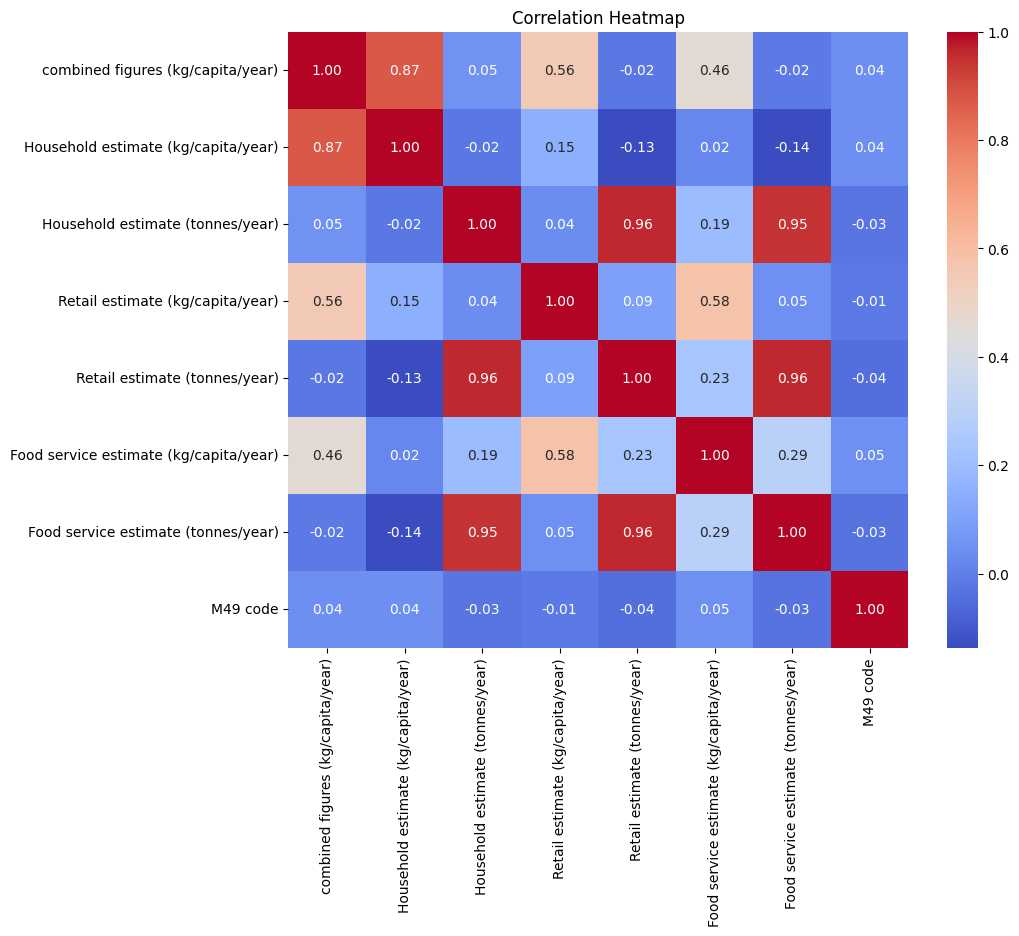

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate the correlation matrix
correlation_matrix = df.corr()

# Step 2: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')  # Annotate the heatmap with correlation values
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Import necessary libraries for classification and confusion matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

In [ ]:
print(df.columns)

Index(['combined figures (kg/capita/year)',
       'Household estimate (kg/capita/year)',
       'Household estimate (tonnes/year)', 'Retail estimate (kg/capita/year)',
       'Retail estimate (tonnes/year)',
       'Food service estimate (kg/capita/year)',
       'Food service estimate (tonnes/year)', 'M49 code'],
      dtype='object')


In [ ]:
X = df.drop(columns=['combined figures (kg/capita/year)'])  # Features (all columns except the target)
y = df['combined figures (kg/capita/year)']  # Target column

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 1.5058348919911633e-19
R-squared Score: 1.0


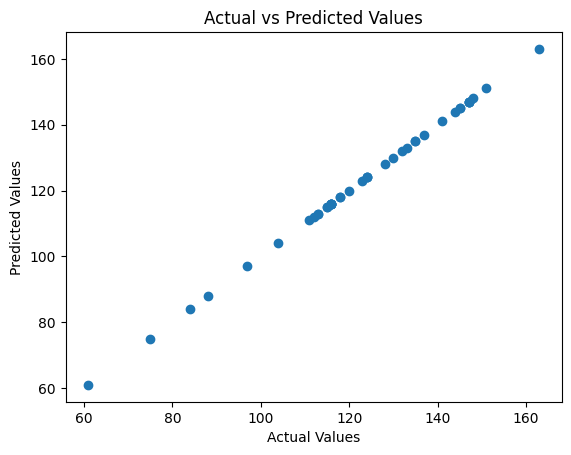

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [ ]:
df['combined_class'] = pd.cut(df['combined figures (kg/capita/year)'],
                              bins=3,
                              labels=['Low', 'Medium', 'High'])

# Encode the labels into numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['combined_class_encoded'] = le.fit_transform(df['combined_class'])

In [ ]:
X = df.drop(columns=['combined figures (kg/capita/year)', 'combined_class', 'combined_class_encoded'])

# Target: The encoded classification target
y = df['combined_class_encoded']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = classifier.predict(X_test)


In [ ]:
# Import metrics for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")




Accuracy: 97.67%
Confusion Matrix:
[[25  0]
 [ 1 17]]


In [ ]:
from sklearn.metrics import classification_report

# If you have two classes, update target_names accordingly
class_report = classification_report(y_test, y_pred, target_names=['Low', 'High'])
print(f"Classification Report:\n{class_report}")


Classification Report:
              precision    recall  f1-score   support

         Low       0.96      1.00      0.98        25
        High       1.00      0.94      0.97        18

    accuracy                           0.98        43
   macro avg       0.98      0.97      0.98        43
weighted avg       0.98      0.98      0.98        43



In [ ]:
# Feature importance from the RandomForestClassifier
importances = classifier.feature_importances_
feature_names = X.columns

# Display feature importance
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance:.4f}")


Household estimate (kg/capita/year): 0.6707
Household estimate (tonnes/year): 0.0729
Retail estimate (kg/capita/year): 0.0580
Retail estimate (tonnes/year): 0.0524
Food service estimate (kg/capita/year): 0.0632
Food service estimate (tonnes/year): 0.0505
M49 code: 0.0323
